In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score,classification_report, recall_score, f1_score, confusion_matrix

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/AI PROJECT/Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [ ]:
data.shape

(374, 13)

In [ ]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [ ]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
u_data = data.drop_duplicates()

In [ ]:
u_data.duplicated().sum()

0

In [ ]:
u_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
# Dropping 'Person ID' if it's not useful for prediction
u_data.drop('Person ID', axis=1, inplace=True)

In [ ]:
u_data['Sleep Disorder'].fillna('No Disease', inplace=True)
u_data['BMI Category'] = u_data['BMI Category'].replace('Normal Weight', 'Normal')

In [ ]:
X[['Systolic BP', 'Diastolic BP']] = X['Blood Pressure'].str.split('/', expand=True)

# Dropping the original "Blood pressure" column
X = X.drop('Blood Pressure', axis=1)

In [ ]:
# Creation of data for the OneHotEncoding
categorical_cols = ['Gender', 'Occupation', 'BMI Category']

In [ ]:
# Defining the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

In [ ]:
# New OneHotEncoded column preparation
X_preprocessed = preprocessor.fit_transform(X)

In [ ]:
X_preprocessed

array([[0.0, 1.0, 0.0, ..., 4200, '126', '83'],
       [0.0, 1.0, 0.0, ..., 10000, '125', '80'],
       [0.0, 1.0, 0.0, ..., 10000, '125', '80'],
       ...,
       [1.0, 0.0, 0.0, ..., 7000, '140', '95'],
       [1.0, 0.0, 0.0, ..., 7000, '140', '95'],
       [1.0, 0.0, 0.0, ..., 7000, '140', '95']], dtype=object)

In [ ]:
# Data splitting
xtrain,xtest,ytrain,ytest=train_test_split(X_preprocessed,Y,test_size=0.25,random_state=42)

In [ ]:
# Defining model
KNN=KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    algorithm='ball_tree',
    leaf_size=60,
    metric='euclidean',
    n_jobs=-1
)

In [ ]:
# Fitting the model
KNN.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=60, metric='euclidean',
                     n_jobs=-1, weights='distance')

In [ ]:
# Storing the predicted model values
y_pred=KNN.predict(xtest)

In [ ]:
test_score = KNN.score(xtest, ytest)

In [ ]:
print("Test Accuracy:", test_score)

Test Accuracy: 0.8936170212765957


In [ ]:
# Getting classification report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

    Insomnia       0.70      0.82      0.76        17
  No Disease       0.96      0.98      0.97        55
 Sleep Apnea       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.90      0.89      0.89        94



<Axes: >

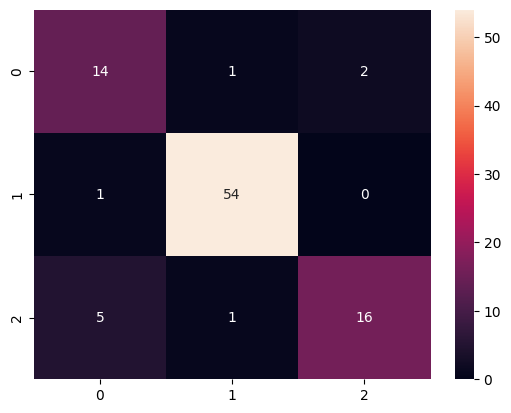

In [ ]:
# Getting the confusion matrix heatmap
sns.heatmap(confusion_matrix(ytest,y_pred), annot=True,cbar=True)

In [ ]:
# Accuracy
accuracy = accuracy_score(ytest, y_pred)
print("Testing Accuracy:", accuracy)

# Precision, Recall, F1-score for each class (average='weighted' for multiclass)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')
print("Testing Precision:", precision)
print("Testing Recall:", recall)
print("Testing F1-score:", f1)

Testing Accuracy: 0.8936170212765957
Testing Precision: 0.8988432961837217
Testing Recall: 0.8936170212765957
Testing F1-score: 0.8933870040253019


In [ ]:
y_train_pred= KNN.predict(xtrain)

In [ ]:
accuracy = accuracy_score(ytrain, y_train_pred)
print("Training Accuracy:", accuracy)

# Precision, Recall, F1-score for each class (average='weighted' for multiclass)
precision = precision_score(ytrain, y_train_pred, average='weighted')
recall = recall_score(ytrain, y_train_pred, average='weighted')
f1 = f1_score(ytrain, y_train_pred, average='weighted')
print("Training Precision:", precision)
print("Training Recall:", recall)
print("Trainig F1-score:", f1)

Training Accuracy: 0.9321428571428572
Training Precision: 0.9320805389043861
Training Recall: 0.9321428571428572
Trainig F1-score: 0.9320349988994057
